In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pand

In [55]:
df = pd.read_excel('Pitching Data.xlsx', usecols="A:J")


# Pitch Usage Data

In [119]:
def usage(pitch_type, dataframe):
    num_pitches = dataframe[dataframe['Type'] == pitch_type].size
    return num_pitches

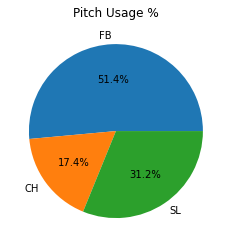

In [120]:
pitch_usage = np.array([usage('FB', df), usage('CH', df), usage('SL', df)])

plt.pie(pitch_usage, labels=['FB', 'CH','SL'], autopct='%1.1f%%')
plt.title("Pitch Usage %")
plt.show()

In [58]:
def plot_pitches(dataframe, title):
    groups = dataframe.groupby('Type')
    x = dataframe.loc[:,"X"]
    y = dataframe.loc[:,"Y"]
    
    for name, group in groups:
        plt.scatter(group.X, group.Y, label=name)

    rect = patches.Rectangle((-8.5,-8.5), 17, 17, fill=False, color="red")
    plt.gca().add_patch(rect)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show()

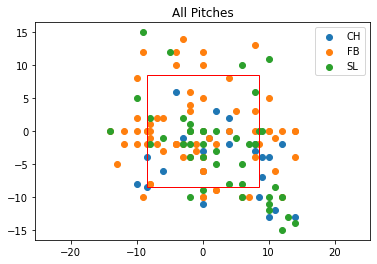

In [59]:
all_pitches = df

plot_pitches(all_pitches, "All Pitches")

# Pitch charts for all pitches in 2022 season by pitch type

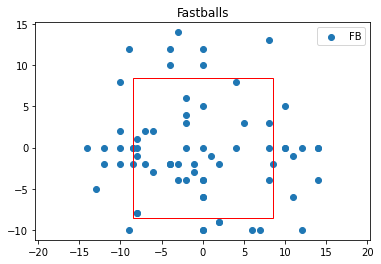

In [60]:
fastballs = df[df['Type'] == 'FB']

plot_pitches(fastballs, "Fastballs")

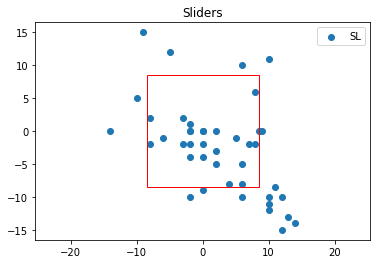

In [61]:
sliders = df[df['Type'] == 'SL']

plot_pitches(sliders, "Sliders")

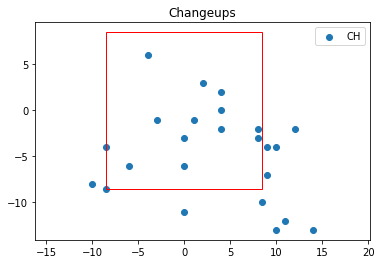

In [62]:
changeups = df[df['Type'] == 'CH']

plot_pitches(changeups, "Changeups")

# Strike % by Pitch Type

In [114]:
def strike_percentage(type):
    all_type = df[df['Type'] == type]
    all_strikes = all_type[all_type['Call'] == 'S']
    strike_percent = all_strikes.size/all_type.size
    return strike_percent

In [115]:
groups = df.groupby('Type')

for name, group in groups:
    print("{:s}: {:0.2f}%".format(name, strike_percentage(name)*100))

CH: 75.00%
FB: 63.38%
SL: 62.79%


# Pitch charts for all pitches in 2022 season by count

In [124]:
def filter_by_count(balls, strikes):
    count = df[df['Balls'] == balls]
    count = count[count['Strikes'] == strikes]
    return count
    

In [125]:
def usage_percentage_by_count(balls, strikes):
    count = filter_by_count(balls, strikes)
    pitch_usage = np.array([usage('FB', count), usage('CH', count), usage('SL', count)])

    plt.pie(pitch_usage, labels=['FB', 'CH','SL'], autopct='%1.1f%%')
    plt.title("Pitch Usage %")
    plt.show()

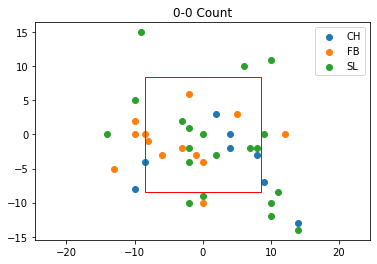

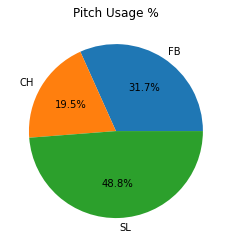

In [126]:
zero_zero_count = df[df['Balls'] == 0]
zero_zero_count = zero_zero_count[zero_zero_count['Strikes'] == 0]

plot_pitches(zero_zero_count, "0-0 Count")
usage_percentage_by_count(0,0)

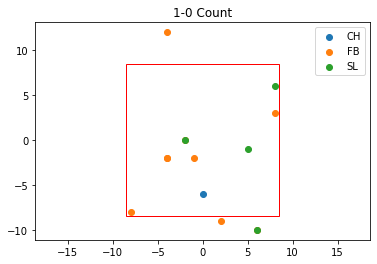

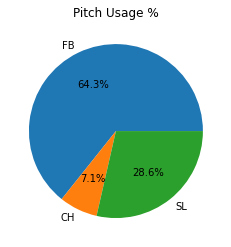

In [127]:
one_zero_count = df[df['Balls'] == 1]
one_zero_count = one_zero_count[one_zero_count['Strikes'] == 0]

plot_pitches(one_zero_count, "1-0 Count")
usage_percentage_by_count(1,0)

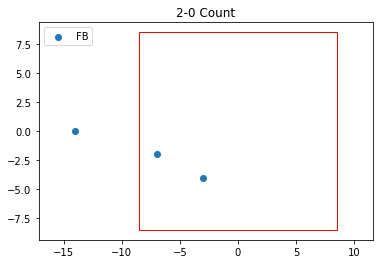

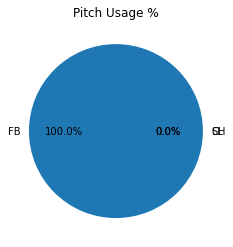

In [128]:
two_zero_count = df[df['Balls'] == 2]
two_zero_count = two_zero_count[two_zero_count['Strikes'] == 0]

plot_pitches(two_zero_count, "2-0 Count")
usage_percentage_by_count(2,0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


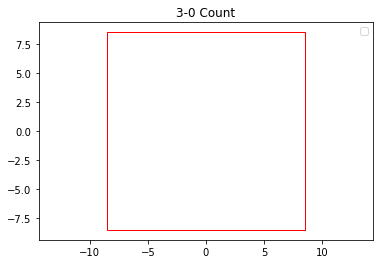

In [130]:
three_zero_count = df[df['Balls'] == 3]
three_zero_count = three_zero_count[three_zero_count['Strikes'] == 0]

plot_pitches(three_zero_count, "3-0 Count")

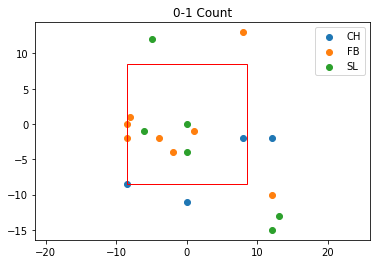

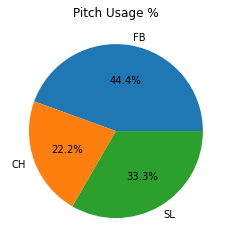

In [131]:
zero_one_count = df[df['Balls'] == 0]
zero_one_count = zero_one_count[zero_one_count['Strikes'] == 1]

plot_pitches(zero_one_count, "0-1 Count")
usage_percentage_by_count(0,1)

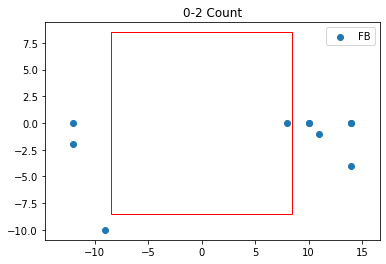

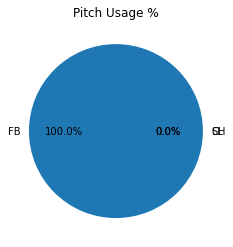

In [132]:
zero_two_count = df[df['Balls'] == 0]
zero_two_count = zero_two_count[zero_two_count['Strikes'] == 2]

plot_pitches(zero_two_count, "0-2 Count")
usage_percentage_by_count(0,2)

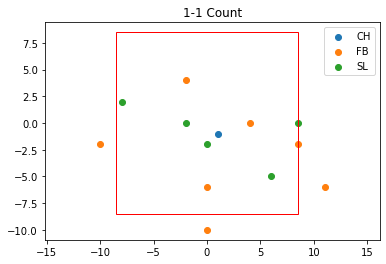

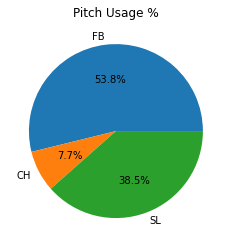

In [133]:
one_one_count = df[df['Balls'] == 1]
one_one_count = one_one_count[one_one_count['Strikes'] == 1]

plot_pitches(one_one_count, "1-1 Count")
usage_percentage_by_count(1,1)

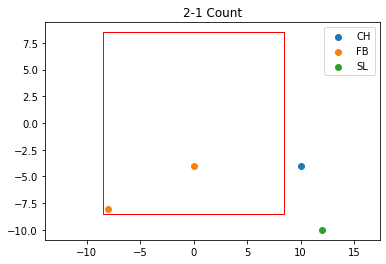

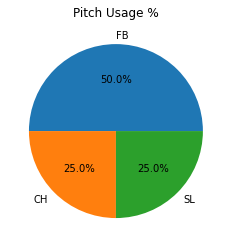

In [134]:
two_one_count = df[df['Balls'] == 2]
two_one_count = two_one_count[two_one_count['Strikes'] == 1]

plot_pitches(two_one_count, "2-1 Count")
usage_percentage_by_count(2,1)

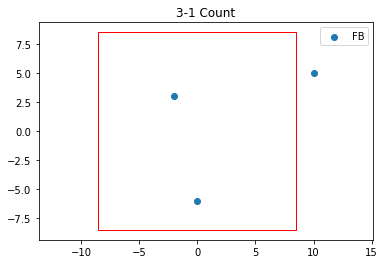

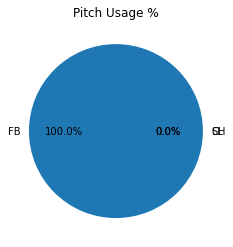

In [135]:
three_one_count = df[df['Balls'] == 3]
three_one_count = three_one_count[three_one_count['Strikes'] == 1]

plot_pitches(three_one_count, "3-1 Count")
usage_percentage_by_count(3,1)

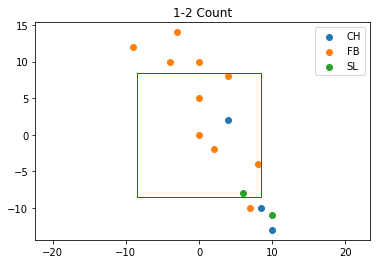

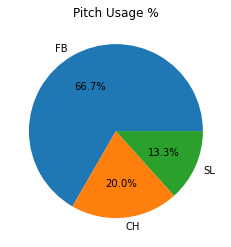

In [136]:
one_two_count = df[df['Balls'] == 1]
one_two_count = one_two_count[one_two_count['Strikes'] == 2]

plot_pitches(one_two_count, "1-2 Count")
usage_percentage_by_count(1,2)

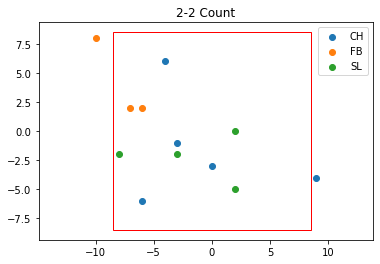

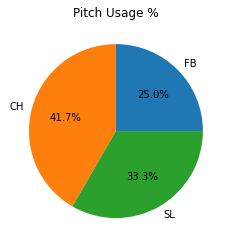

In [137]:
two_two_count = df[df['Balls'] == 2]
two_two_count = two_two_count[two_two_count['Strikes'] == 2]

plot_pitches(two_two_count, "2-2 Count")
usage_percentage_by_count(2,2)

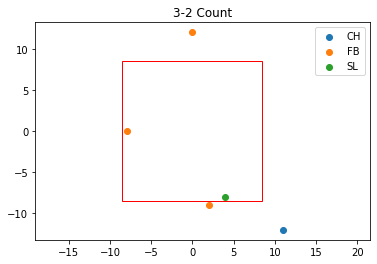

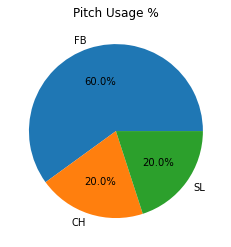

In [138]:
three_two_count = df[df['Balls'] == 3]
three_two_count = three_two_count[three_two_count['Strikes'] == 2]

plot_pitches(three_two_count, "3-2 Count")
usage_percentage_by_count(3,2)

# Whiff% by pitch type

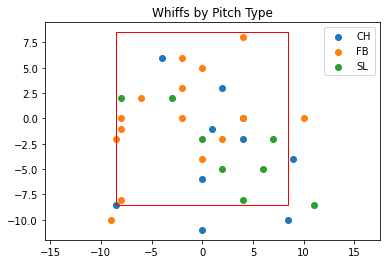

In [83]:
whiff = df[df['Swinging'] == 'Y']
whiff = whiff[whiff['EV'].isna()]

plot_pitches(whiff, "Whiffs by Pitch Type")


In [91]:
def whiff_percentage(type):
    all_type = df[df['Type'] == type]
    all_swinging = all_type[all_type['Swinging'] == 'Y']
    all_whiffs = all_swinging[all_swinging['EV'].isna()]
    whiff_percent = all_whiffs.size/all_swinging.size
    return whiff_percent

In [97]:
groups = df.groupby('Type')

for name, group in groups:
    print("{:s}: {:0.2f}%".format(name, whiff_percentage(name)*100))

CH: 71.43%
FB: 48.39%
SL: 61.54%


# Batted Ball Profiles

## Avg Exit Velo by Pitch Type

In [108]:
def avg_exit_velo(pitch_type):
    all_pitches = df[df['Type'] == pitch_type]
    exit_velo = all_pitches['EV'].mean()
    return exit_velo
    


In [113]:
groups = df.groupby('Type')

for name, group in groups:
    print("{:s}: {:0.2f} mph".format(name, avg_exit_velo(name)))

CH: 81.25 mph
FB: 82.81 mph
SL: 81.00 mph


## FB/GB/LD Percentages

### All Pitch Types

In [144]:
def balls_in_play(dataframe):
    fb = dataframe[dataframe.Outcome.eq('FB')]
    gb = dataframe[dataframe.Outcome.eq('GB')]
    ld = dataframe[dataframe.Outcome.eq('LD')]
    
    total_size = fb.size + gb.size + ld.size
    fb_per = fb.size/total_size
    gb_per = gb.size/total_size
    ld_per = ld.size/total_size
    return fb_per, gb_per, ld_per

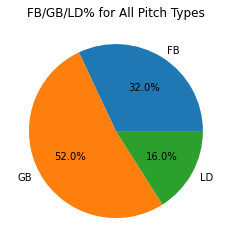

In [155]:

fb, gb, ld = balls_in_play(df)
y = np.array([fb, gb, ld])
plt.pie(y, labels=['FB', 'GB','LD'], autopct='%1.1f%%')
plt.title("FB/GB/LD% for All Pitch Types")
plt.show()

### By Pitch Type

In [147]:
def fb_gb_ld_by_pitch_type(dataframe, pitch_type):
    dataframe = dataframe[dataframe['Type'] == pitch_type]
    fb = dataframe[dataframe.Outcome.eq('FB')]
    gb = dataframe[dataframe.Outcome.eq('GB')]
    ld = dataframe[dataframe.Outcome.eq('LD')]
    
    total_size = fb.size + gb.size + ld.size
    fb_per = fb.size/total_size
    gb_per = gb.size/total_size
    ld_per = ld.size/total_size
    return fb_per, gb_per, ld_per

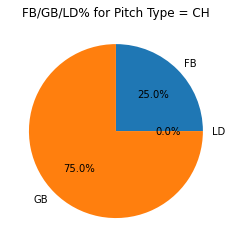

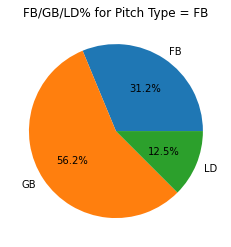

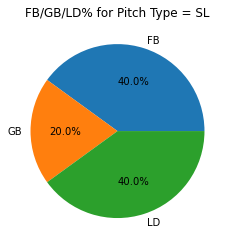

In [152]:
groups = df.groupby('Type')

for name, group in groups:
    fb, gb, ld = fb_gb_ld_by_pitch_type(df, name)
    y = np.array([fb, gb, ld])
    
    plt.pie(y, labels=['FB', 'GB','LD'], autopct='%1.1f%%')
    plt.title("FB/GB/LD% for Pitch Type = {:s}".format(name))
    plt.show()

# Pitch Effectiveness
A pitch is considered a Quality Pitch if it meets the following criteria:
     If it is a swinging or called strike
     If it produces a groundball

In [161]:
def quality_strikes(dataframe):
    all_strikes = dataframe[dataframe['Call'] == 'S']
    strikes_not_in_play = all_strikes[all_strikes['EV'].isna()]
    num_strikes = strikes_not_in_play.size
    return num_strikes

In [174]:
def quality_bip(dataframe):
    all_gb = dataframe[dataframe['Outcome'] == 'GB']
    all_pu = dataframe[dataframe['Outcome'] == 'FB']
    all_pu = all_pu[all_pu['LA'] >= 60]
    return all_gb.size + all_pu.size

In [175]:
total_quality_pitches = quality_strikes(df) + quality_bip(df)

qpp = (total_quality_pitches/df.size)*100

print("Quality Pitch Percentage for all Pitch Types: {:0.2f}%".format(qpp))

Quality Pitch Percentage for all Pitch Types: 58.70%


In [166]:
def quality_strikes_by_pitch(dataframe, pitch_type):
    all_type = dataframe[dataframe['Type'] == pitch_type]
    all_strikes = all_type[all_type['Call'] == 'S']
    strikes_not_in_play = all_strikes[all_strikes['EV'].isna()]
    num_strikes = strikes_not_in_play.size
    return num_strikes

In [172]:
def quality_bip_by_pitch(dataframe, pitch_type):
    all_type = dataframe[dataframe['Type'] == pitch_type]
    all_gb = all_type[all_type['Outcome'] == 'GB']
    all_pu = all_type[all_type['Outcome'] == 'FB']
    all_pu = all_pu[all_pu['LA'] >= 60]
    return all_gb.size + all_pu.size

In [173]:
groups = df.groupby('Type')

for name, group in groups:
    all_type = df[df['Type'] == name]
    total_quality_pitches = quality_strikes_by_pitch(df, name) + quality_bip_by_pitch(df, name)

    qpp = (total_quality_pitches/all_type.size)*100

    print("Quality Pitch Percentage for Pitch Type = {:s}: {:0.2f}%".format(name, qpp))

Quality Pitch Percentage for Pitch Type = CH: 70.83%
Quality Pitch Percentage for Pitch Type = FB: 54.93%
Quality Pitch Percentage for Pitch Type = SL: 58.14%


# MLB Comps

In [325]:
mlb_pitchers_2021 = pd.read_excel('mlb_pitchers_2021.xlsx', usecols="A:J")

window = 2.5

In [301]:
def sim_fb_usage(dataframe, window):
    fb_usage = (usage('FB', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['fastball'].between(fb_usage-window, fb_usage+window)]
    return sim_mlb

In [302]:
def sim_ch_usage(dataframe, window):
    ch_usage = (usage('CH', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['changeup'].between(ch_usage-window, ch_usage+window)]
    return sim_mlb

In [303]:
def sim_sl_usage(dataframe, window):
    sl_usage = (usage('SL', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['slider'].between(sl_usage-window, sl_usage+window)]
    return sim_mlb

## MLB Pitchers With Similar Pitch Usage Profiles

In [276]:
def construct_savant_url(dataframe):
    for index, row in dataframe.iterrows():
        print("Baseball Savant URL for {:s} {:s}: ".format(row['first'], row['last']))
        first_name = row['first'].lower().strip()
        last_name = row['last'].lower().strip()
        id = str(row['pitcher'])
        url = 'https://baseballsavant.mlb.com/savant-player/' + first_name +'-' + last_name + '-' + id + '?stats=statcast-r-pitching-mlb'
        print(url)


In [304]:
mlb_comps= sim_fb_usage(df, window).merge(sim_ch_usage(df, window), on='pitcher', how='inner').merge(sim_sl_usage(df, window), on='pitcher', how='inner', sort=True)
mlb_comps = mlb_comps[['last', 'first','pitcher', 'fastball', 'slider', 'changeup', 'curve', 'splitter']]
print("Our pitcher's usage profile: FB: {: 0.2f}%, SL: {: 0.2f}%, CH: {: 0.2f}%\nComparable Pitchers in MLB:".format(usage('FB', df)/df.size*100, usage('SL', df)/df.size*100, usage('CH', df)/df.size*100))
print(mlb_comps)
print()
construct_savant_url(mlb_comps)

Our pitcher's usage profile: FB:  51.45%, SL:  31.16%, CH:  17.39%
Comparable Pitchers in MLB:
     last    first  pitcher  fastball  slider  changeup  curve  splitter
0  Clarke   Taylor   664199      53.4    28.9      15.6    2.0       0.0

Baseball Savant URL for  Taylor Clarke: 
https://baseballsavant.mlb.com/savant-player/taylor-clarke-664199?stats=statcast-r-pitching-mlb


## Identifying High-Performing Pitchers with Similar Arsenals 

In [314]:
pitchers_stats_2021 = pd.read_excel('expected_stats_2021.xlsx', usecols="A:G")

In [319]:
#Filter out pitchers with different arsenals
sim_arsenals = mlb_pitchers_2021[(mlb_pitchers_2021['fastball'] > 20) & (mlb_pitchers_2021['changeup'] > 10) & (mlb_pitchers_2021['slider'] > 20) & (mlb_pitchers_2021['curve'] < 5)]
sim_arsenals = pitchers_stats_2021.merge(sim_arsenals, on='pitcher')
sim_arsenals = sim_arsenals.sort_values('estwoba')
print(sim_arsenals)

        last_x   first_x  pitcher  estba  estslg  estwoba  xera      last_y  \
0     Iglesias    Raisel   628452  0.190   0.331    0.243  2.45    Iglesias   
1       Tepera      Ryan   572193  0.171   0.280    0.249  2.58      Tepera   
2       RodÃ³n    Carlos   607074  0.189   0.314    0.254  2.68      RodÃ³n   
3          May    Trevor   543507  0.192   0.349    0.264  2.90         May   
4      Giolito     Lucas   608337  0.221   0.362    0.280  3.27     Giolito   
5      GarcÃ­a   JarlÃ­n   606424  0.222   0.367    0.281  3.30     GarcÃ­a   
6       Watson      Tony   453265  0.223   0.359    0.283  3.35      Watson   
7    Boxberger      Brad   502202  0.203   0.348    0.286  3.42   Boxberger   
8    Alcantara     Sandy   645261  0.232   0.369    0.288  3.47   Alcantara   
9       Alcala     Jorge   660896  0.226   0.404    0.293  3.60      Alcala   
10       Wells     Tyler   669330  0.222   0.418    0.293  3.60       Wells   
11       Cessa      Luis   570666  0.251   0.374    

In [326]:
# Take top 10 guys from list
sim_arsenals = sim_arsenals[['last_x', 'first_x', 'pitcher', 'fastball', 'sinker', 'cutter', 'slider', 'changeup', 'curve', 'splitter', 'estba', 'estslg', 'estwoba', 'xera']]
top_10 = sim_arsenals.head(10)
print("Top 10 MLB Performers by wOBA With Similar Pitch Mixes\n")
print(top_10)
for index, row in top_10.iterrows():
    print()
    print("Baseball Savant URL for {:s} {:s}: ".format(row['first_x'], row['last_x']))
    first_name = row['first_x'].lower().strip()
    last_name = row['last_x'].lower().strip()
    id = str(row['pitcher'])
    url = 'https://baseballsavant.mlb.com/savant-player/' + first_name +'-' + last_name + '-' + id + '?stats=statcast-r-pitching-mlb'
    print(url)

Top 10 MLB Performers by wOBA With Similar Pitch Mixes

      last_x   first_x  pitcher  fastball  sinker  cutter  slider  changeup  \
0   Iglesias    Raisel   628452      34.9     9.6     0.0    30.8      24.6   
1     Tepera      Ryan   572193      33.2    10.9     0.0    44.9      10.4   
2     RodÃ³n    Carlos   607074      58.7     0.0     0.0    27.2      12.4   
3        May    Trevor   543507      60.3     0.0     0.0    24.5      15.2   
4    Giolito     Lucas   608337      43.9     0.0     0.0    21.5      31.8   
5    GarcÃ­a   JarlÃ­n   606424      50.0     0.0     0.0    25.4      24.6   
6     Watson      Tony   453265      25.2    17.4     0.0    24.1      33.3   
7  Boxberger      Brad   502202      55.9     0.0     0.0    23.9      20.2   
8  Alcantara     Sandy   645261      21.6    28.2     0.0    24.1      23.5   
9     Alcala     Jorge   660896      37.3     6.0     0.0    40.7      16.0   

   curve  splitter  estba  estslg  estwoba  xera  
0    0.0       0.0  0.1